# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.left_hand_landmarks.landmark)

21

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

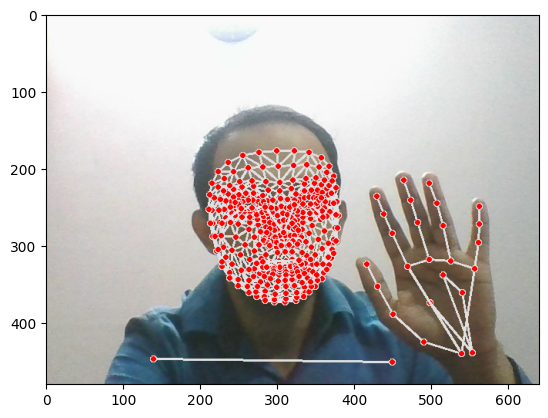

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.48140985,  0.59093726, -1.36874318, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.48140985,  0.59093726, -1.36874318, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [14]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hello','Thanks','Bye','A','B','C','L'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [22]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [23]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [24]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [16]:
label_map = {label:num for num, label in enumerate(actions)}

In [17]:
label_map

{'Hello': 0, 'Thanks': 1, 'Bye': 2, 'A': 3, 'B': 4, 'C': 5, 'L': 6}

In [18]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [19]:
np.array(sequences).shape

(210, 30, 1662)

In [20]:
np.array(labels).shape

(210,)

In [21]:
X = np.array(sequences)

In [22]:
X.shape

(210, 30, 1662)

In [23]:
y = to_categorical(labels).astype(int)

In [24]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,random_state=2)

In [26]:
y_test.shape

(11, 7)

# 7. Build and Train LSTM Neural Network

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Conv1D,MaxPooling1D,Flatten
from tensorflow.keras.callbacks import TensorBoard

In [28]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [24]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(256, return_sequences=True, activation='relu'))
# model.add(LSTM(512, return_sequences=True, activation='relu'))
# model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [32]:
res = [.7, 0.2, 0.1]
actions.shape

(7,)

In [41]:
actions[np.argmax(res)]

'Hello'

In [25]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [67]:
model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback])

Epoch 1/300
7/7 [==============================] - 1s 142ms/step - loss: 1.8868 - categorical_accuracy: 0.1558
Epoch 2/300
7/7 [==============================] - 1s 143ms/step - loss: 1.7895 - categorical_accuracy: 0.2412
Epoch 3/300
7/7 [==============================] - 1s 141ms/step - loss: 1.7622 - categorical_accuracy: 0.2563
Epoch 4/300
7/7 [==============================] - 1s 142ms/step - loss: 1.8118 - categorical_accuracy: 0.2312
Epoch 5/300
7/7 [==============================] - 1s 126ms/step - loss: 1.6618 - categorical_accuracy: 0.2312
Epoch 6/300
7/7 [==============================] - 1s 132ms/step - loss: 1.4784 - categorical_accuracy: 0.2864
Epoch 7/300
7/7 [==============================] - 1s 123ms/step - loss: 1.4560 - categorical_accuracy: 0.3417
Epoch 8/300
7/7 [==============================] - 1s 136ms/step - loss: 1.3880 - categorical_accuracy: 0.3116
Epoch 9/300
7/7 [==============================] - 1s 139ms/step - loss: 1.3627 - categorical_accuracy: 0.3618
E

In [69]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_29 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_30 (LSTM)              (None, 30, 256)           394240    
                                                                 
 lstm_31 (LSTM)              (None, 128)               197120    
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 32)               

# 8. Make Predictions

In [45]:
res = model.predict(X_test)

1/1 [==============================] - 0s 234ms/step


In [46]:
actions[np.argmax(res[4])]

'C'

In [47]:
actions[np.argmax(y_test[4])]

'Thanks'

# 9. Save Weights

In [ ]:
model.save('lstm2212.h5')

In [49]:
model.load_weights('lstm2212.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [53]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [70]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 332ms/step


In [71]:
ytrue = np.argmax(y_test, axis=1).tolist()
y_predicted = np.argmax(yhat, axis=1).tolist()

In [72]:
multilabel_confusion_matrix(ytrue, y_predicted)
accuracy_score(ytrue, y_predicted)

0.7272727272727273

In [73]:
#training data accuracy
yhat = model.predict(X_train)
ytrue2 = np.argmax(y_train, axis=1).tolist()
y_predicted2 = np.argmax(yhat, axis=1).tolist()

7/7 [==============================] - 0s 63ms/step


In [74]:
accuracy_score(ytrue2, y_predicted2)

0.8793969849246231

In [68]:
multilabel_confusion_matrix(ytrue2, y_predicted2)

array([[[ 8,  0],
        [ 0,  3]],

       [[ 9,  0],
        [ 0,  2]],

       [[ 8,  0],
        [ 0,  3]],

       [[10,  0],
        [ 0,  1]],

       [[ 9,  0],
        [ 0,  2]]], dtype=int64)

CNN + LSTM (LRCN)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,random_state=2)

In [36]:
lrcn = Sequential([
    Conv1D(filters=32, kernel_size=4, activation='relu', input_shape=(30,1662)),
    MaxPooling1D(pool_size=2),
    
    Conv1D(filters=64, kernel_size=4, activation='relu'),
    Conv1D(filters=128, kernel_size=4, activation='relu'),
    Conv1D(filters=64, kernel_size=4, activation='relu'),
    MaxPooling1D(pool_size=2),
    
#     Flatten(),
    
    LSTM(64),
    
#     Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

In [37]:
lrcn.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lrcn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 27, 32)            212768    
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 13, 32)           0         
 1D)                                                             
                                                                 
 conv1d_15 (Conv1D)          (None, 10, 64)            8256      
                                                                 
 conv1d_16 (Conv1D)          (None, 7, 128)            32896     
                                                                 
 conv1d_17 (Conv1D)          (None, 4, 64)             32832     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 2, 64)            0         
 1D)                                                  

In [70]:
X_train.shape,y_train.shape

((199, 30, 1662), (199, 7))

In [60]:
yhat2 = lrcn.predict(X_test)

1/1 [==============================] - 0s 250ms/step


In [61]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat2 = np.argmax(yhat2, axis=1).tolist()

In [62]:
multilabel_confusion_matrix(ytrue, yhat2)

array([[[10,  0],
        [ 0,  1]],

       [[ 9,  0],
        [ 1,  1]],

       [[ 8,  0],
        [ 0,  3]],

       [[ 9,  0],
        [ 0,  2]],

       [[ 8,  1],
        [ 0,  2]],

       [[10,  0],
        [ 0,  1]]], dtype=int64)

In [64]:
accuracy_score(ytrue, yhat2)

0.9090909090909091

In [82]:
lrcn.save('finallrcn.h5')

In [65]:
lrcn.save('lrcn90_28_12.h5')

CNN

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,random_state=0)

In [32]:
cnn = Sequential([
    Conv1D(filters=32, kernel_size=4, activation='relu', input_shape=(30,1662)),
    MaxPooling1D(pool_size=2),
    
    Conv1D(filters=64, kernel_size=4, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

In [33]:
cnn.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 27, 32)            212768    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 64)            8256      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [40]:
cnn2.fit(X_train,y_train,epochs=200)

Epoch 1/200
7/7 [==============================] - 0s 22ms/step - loss: 0.3527 - accuracy: 0.8693
Epoch 2/200
7/7 [==============================] - 0s 27ms/step - loss: 0.3128 - accuracy: 0.8894
Epoch 3/200
7/7 [==============================] - 0s 22ms/step - loss: 0.3379 - accuracy: 0.8593
Epoch 4/200
7/7 [==============================] - 0s 29ms/step - loss: 0.2961 - accuracy: 0.8995
Epoch 5/200
7/7 [==============================] - 0s 32ms/step - loss: 0.3104 - accuracy: 0.8894
Epoch 6/200
7/7 [==============================] - 0s 33ms/step - loss: 0.3089 - accuracy: 0.8894
Epoch 7/200
7/7 [==============================] - 0s 30ms/step - loss: 0.2798 - accuracy: 0.8995
Epoch 8/200
7/7 [==============================] - 0s 28ms/step - loss: 0.2803 - accuracy: 0.9095
Epoch 9/200
7/7 [==============================] - 0s 28ms/step - loss: 0.2860 - accuracy: 0.9045
Epoch 10/200
7/7 [==============================] - 0s 28ms/step - loss: 0.2925 - accuracy: 0.9095
Epoch 11/200
7/7 [=

In [66]:
yhat3 = cnn2.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat3 = np.argmax(yhat3, axis=1).tolist()

1/1 [==============================] - 0s 52ms/step


In [77]:
multilabel_confusion_matrix(ytrue, yhat3)

array([[[10,  0],
        [ 0,  1]],

       [[ 9,  0],
        [ 0,  2]],

       [[ 8,  0],
        [ 0,  3]],

       [[ 9,  0],
        [ 0,  2]],

       [[ 9,  0],
        [ 0,  2]],

       [[10,  0],
        [ 0,  1]]], dtype=int64)

In [66]:
accuracy_score(ytrue, yhat3)

0.8181818181818182

In [32]:
cnn2.save('cnn81_28_12.h5')

# 11. Test in Real Time

In [80]:
colors = [(245,117,16), (117,245,16), (16,117,245),(53,117,245),(16,97,45),(106,90,230),(255,255,255)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [69]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

In [70]:
# sequence.reverse()

In [71]:
# type(sequence)

In [74]:
# len(sequence)

In [75]:
# sequence.append('def')

In [66]:
# sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [67]:
# sequence[-30:]

TypeError: 'int' object is not subscriptable

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = cnn.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [3]:
model.predict(X_train)

NameError: name 'model' is not defined

In [20]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)